In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
import os

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

List the path to the data and anme that was used to saved the date

In [4]:
# path to the data
path = 'data'

# data
linkedin_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.xls'
twitter_data = 'Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.xls'

LinkedIn Data Cleaning

In [5]:
# read data
def read_data(path,data):
    data = pd.read_excel(os.path.join(path,data),
                            engine="xlrd")
    return data

df_linkedIn = read_data(path,linkedin_data)
df_linkedIn.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text

check the number of rows in the datasets

In [6]:
len(df_linkedIn)

7760

Check the datasets information

In [7]:
df_linkedIn.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 147 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         7760 non-null   object 
 1   Post ID                                      7760 non-null   int64  
 2   Network                                      7760 non-null   object 
 3   Post Type                                    7760 non-null   object 
 4   Content Type                                 7760 non-null   object 
 5   Profile                                      7760 non-null   object 
 6   Sent by                                      7760 non-null   object 
 7   Link                                         7756 non-null   object 
 8   Post                                         7729 non-null   object 
 9   Linked Content                               107 non-null    object 
 10 

get alll the columns where all the data are missing

In [8]:
print(df_linkedIn.columns[df_linkedIn.isna().all()])

Index(['Viral Impressions', 'Non-viral Impressions', 'Paid Impressions',
       'Fan Impressions', 'Fan Organic Impressions', 'Fan Paid Impressions',
       'Non-fan Impressions', 'Non-fan Organic Impressions',
       'Non-fan Paid Impressions', 'Reach',
       ...
       'Video Added to Playlists', 'Subscribers Lost from Video',
       'Video Removed from Playlists', 'Annotation Impressions',
       'Annotation Clickable Impressions', 'Annotation Closable Impressions',
       'Annotation Closes', 'Card Impressions', 'Card Teaser Impressions',
       'Card Teaser Clicks'],
      dtype='object', length=122)


##### Data Cleaning and Pre-processing: 

Drop all columns with a null value of less than 1000

In [9]:
df_linkedIn = df_linkedIn.dropna(axis=1, thresh=1000)

Get all the columns with data

In [10]:

df_linkedIn.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)', 'Tags'],
      dtype='object')

After dropping all those data show the real data

In [11]:
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Post ID                           7760 non-null   int64  
 2   Network                           7760 non-null   object 
 3   Post Type                         7760 non-null   object 
 4   Content Type                      7760 non-null   object 
 5   Profile                           7760 non-null   object 
 6   Sent by                           7760 non-null   object 
 7   Link                              7756 non-null   object 
 8   Post                              7729 non-null   object 
 9   Impressions                       6332 non-null   float64
 10  Organic Impressions               6332 non-null   float64
 11  Engagement Rate (per Impression)  6332 non-null   float64
 12  Engage

In [12]:
df_linkedIn.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags
0,7/13/2023 12:03 pm,7085212016608449536,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts
1,2023-12-07 20:00:00,7084969706024999936,LinkedIn,Post,Text,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN
2,2023-12-07 19:00:00,7084954641788010496,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts
3,2023-11-07 14:49:00,7084529022105230336,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts
4,2023-11-07 09:17:00,7084445462967069696,LinkedIn,Post,Photo,Stanbic IBTC,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN


#####  Categorical Variables

getting the datasets of unique variable from the data that looks categorical to me

In [13]:
df_linkedIn.Network.unique()

array(['LinkedIn'], dtype=object)

In [14]:
df_linkedIn['Post Type'].unique()

array(['Post'], dtype=object)

In [15]:
df_linkedIn['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Poll', 'Document', 'Link'], dtype=object)

In [16]:
df_linkedIn['Profile'].unique()

array(['Stanbic IBTC'], dtype=object)

In [17]:
df_linkedIn['Post ID'].unique()

array([7085212016608449536, 7084969706024999936, 7084954641788010496, ...,
       5869784625840159744, 5869425201195809792, 5869021915485599744],
      dtype=int64)

In [18]:
df_linkedIn['Sent by'].unique()

array(['Blessing Ubah', 'Kemi Amoo', ' ', 'Damilare Oyekanmi',
       'Sophia Amuka', 'Aramide Salami', 'Dunni Ogunsanya'], dtype=object)

In [19]:
df_linkedIn['Tags'].unique()

array(['CIB Posts', nan, 'Weekly Wealth Posts', 'Enterprise Campaign',
       'BCC', 'CHNW Mass Retail',
       'Chemistry of Wealth, Weekly Wealth Posts', 'CSI Posts',
       'CIB Posts, PMI', 'LATTES', 'LATTES, Weekly Wealth Posts',
       'Asset Management, Weekly Wealth Posts',
       'BCC, Enterprise Campaign', 'Trustees Posts, Weekly Wealth Posts',
       'Pension, Weekly Wealth Posts', 'CIB Brand Campaign, CIB Posts',
       'BCC, Blue Blossom',
       'Insurance Limited Posts, Weekly Wealth Posts',
       'CHNW Mass Retail, Reward4Saving',
       'Insurance Brokers Posts, Weekly Wealth Posts',
       'Fuze Festival, Weekly Wealth Posts', 'Together4ALimb',
       'Insurance Brokers Posts, Stay IN Business Campaign, Weekly Wealth Posts',
       'BCC, Trade Export Webinar',
       'CHNW Mass Retail, Cybersecurity Webinar, Weekly Wealth Posts',
       'CHNW Mass Retail, Weekly Wealth Posts',
       'BCC, Enterprise Academy Monday', 'BCC, Trade Club',
       'Asset Management, Chemi

Drop all column with all ('Post ID','Profile','Post Type') this information since they have no effect on the data

In [20]:
df_linkedIn = df_linkedIn.drop(columns=['Post ID','Profile','Post Type'],axis=1)
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Network                           7760 non-null   object 
 2   Content Type                      7760 non-null   object 
 3   Sent by                           7760 non-null   object 
 4   Link                              7756 non-null   object 
 5   Post                              7729 non-null   object 
 6   Impressions                       6332 non-null   float64
 7   Organic Impressions               6332 non-null   float64
 8   Engagement Rate (per Impression)  6332 non-null   float64
 9   Engagements                       6332 non-null   float64
 10  Reactions                         6332 non-null   float64
 11  Likes                             6332 non-null   float64
 12  Commen

##### Format Data

Convert datetime datasets to date fromat, and all categorical data to categorical format

In [21]:
df_linkedIn['Date'] = pd.to_datetime(df_linkedIn['Date'])
df_linkedIn['Content Type'] = pd.Categorical(df_linkedIn['Content Type'])
df_linkedIn['Sent by'] = pd.Categorical(df_linkedIn['Sent by'])


In [22]:
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              7760 non-null   datetime64[ns]
 1   Network                           7760 non-null   object        
 2   Content Type                      7760 non-null   category      
 3   Sent by                           7760 non-null   category      
 4   Link                              7756 non-null   object        
 5   Post                              7729 non-null   object        
 6   Impressions                       6332 non-null   float64       
 7   Organic Impressions               6332 non-null   float64       
 8   Engagement Rate (per Impression)  6332 non-null   float64       
 9   Engagements                       6332 non-null   float64       
 10  Reactions                         6332 non-null 

#### Twitter Data cleaning

read the twitter data using the function created at the begining

In [23]:
df_twitter =  read_data(path,twitter_data)
df_twitter.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Viral Impressions,Non-viral Impressions,Paid Impressions,Fan Impressions,Fan Organic Impressions,Fan Paid Impressions,Non-fan Impressions,Non-fan Organic Impressions,Non-fan Paid Impressions,Reach,Organic Reach,Viral Reach,Non-viral Reach,Paid Reach,Fan Reach,Fan Paid Reach,Potential Reach,Engagement Rate (per Impression),Engagement Rate (per Reach),Engagements,Reactions,Likes,Dislikes,Love Reactions,Haha Reactions,Wow Reactions,Sad Reactions,Angry Reactions,Comments,Shares,Saves,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Post Photo View Clicks,Post Video Play Clicks,Other Engagements,Answers,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Negative Feedback,bit.ly Link Clicks,Engaged Users,Engaged Fans,Users Talking About This,Unique Reactions,Unique Comments,Unique Shares,Unique Answers,Unique Post Clicks,Unique Post Link Clicks,Unique Post Photo View Clicks,Unique Post Video Play Clicks,Unique Other Post Clicks,Unique Negative Feedback,Subscribers Gained from Video,Annotation Clicks,Card Clicks,Video Views,Media Views,Organic Video Views,Paid Video Views,Partial Video Views,Organic Partial Video Views,Paid Partial Video Views,Full Video Views,Full Video View Rate,Follow Video Views,For You Video Views,Hashtag Video Views,Business Account Video Views,Sound Video Views,Unspecified Video Views,Organic Full Video Views,Paid Full Video Views,Autoplay Video Views,Click to Play Video Views,Sound on Video Views,Sound off Video Views,10-Second Video Views,Organic 10-Second Video Views,Paid 10-Second Video Views,Autoplay 10-Second Video Views,Click to Play 10-Second Video Views,Sound on 10-Second Video Views,Sound off 10-Second Video Views,Autoplay Partial Video Views,Click to Play Partial Video Views,Autoplay Full Video Views,Click to Play Full Video Views,95% Video Views,Organic 95% Video Views,Paid 95% Video Views,Video Length (Seconds),Average Video Time Watched (Seconds),Video View Time (Seconds),Organic Video View Time (Seconds),Paid Video View Time (Seconds),Unique Video Views,Unique Organic Video Views,Unique Paid Video Views,Unique 10-Second Video Views,Unique Full Video Views,Unique Organic 95% Video Views,Unique Paid 95% Video Views,Video Ad Break Ad Impressions,Video Ad Break Ad Earnings,Video Ad Break Ad Cost per Impression (CPM),YouTube Premium Views,Estimated Minutes Watched,Estimated Premium Minutes Watched,Story Taps Back,Story Taps Forward,Story Exits,Story Replies,Video Added to Playlists,Subscribers Lost from Video,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429829567946759,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1,445.00,445.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,345718.00,0.04,nan,16.00,4.00,4.00,nan,nan,nan,nan,nan,nan,2.00,1.00,nan,nan,nan,9.00,9.00,1.00,0.00,7.00,1.00,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,

read the data information to know the number of non-null dataasets in each columns

In [24]:
df_twitter.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 147 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         8529 non-null   object 
 1   Post ID                                      8529 non-null   int64  
 2   Network                                      8529 non-null   object 
 3   Post Type                                    8529 non-null   object 
 4   Content Type                                 8529 non-null   object 
 5   Profile                                      8529 non-null   object 
 6   Sent by                                      8529 non-null   object 
 7   Link                                         8481 non-null   object 
 8   Post                                         8529 non-null   object 
 9   Linked Content                               4978 non-null   object 
 10 

In [25]:
len(df_twitter)

8529

drop all columns with a null value of less than 1000

In [26]:
df_twitter = df_twitter.dropna(axis=1, thresh=1000)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Post ID                           8529 non-null   int64  
 2   Network                           8529 non-null   object 
 3   Post Type                         8529 non-null   object 
 4   Content Type                      8529 non-null   object 
 5   Profile                           8529 non-null   object 
 6   Sent by                           8529 non-null   object 
 7   Link                              8481 non-null   object 
 8   Post                              8529 non-null   object 
 9   Linked Content                    4978 non-null   object 
 10  Impressions                       7842 non-null   float64
 11  Organic Impressions               7842 non-null   float64
 12  Potent

In [27]:
df_twitter.head(2)

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429829567946759,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o",https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1,445.00,445.00,345718.00,0.04,16.00,4.00,4.00,2.00,1.00,nan,nan,9.00,9.00,1.00,0.00,7.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,CIB Posts
1,2023-12-07 20:03:00,1679204777081860096,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204777081864192,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE",NaN,2961.00,2961.00,347102.00,0.02,52.00,11.00,11.00,20.00,3.00,nan,nan,18.00,18.00,nan,1.00,12.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,NaN


Categorical Variables

explore all the data that looks like categorical datasets ion the twitter datasets

In [28]:
df_twitter.Network.unique()

array(['Twitter'], dtype=object)

In [29]:
df_twitter['Post Type'].unique()

array(['Tweet'], dtype=object)

In [30]:
df_twitter['Post'].unique()

array(['Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest https://t.co/lwNxLg911o',
       'What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE',
       'Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://t.co/Dpi7LF0TQK today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE https://t.co/qJwLGZsDEg',
       ...,
       'Now on at the Stanbic IBTC sponsored BIT Hub: "Pushing the Envelope" hosted by Google @SMWLagos #smwlagos #smwEnvelopes',
       "'@SMWLagos starts today. We're proud sponsors of the BIT Hub at Porsche Centre, VI. Here's today's events #SMWLagos http://t.co/QJRRJQPT",
       'We are proud to be sponsors of the BIT hub at #SMWLagos (@

In [31]:
df_twitter['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Link'], dtype=object)

In [32]:
df_twitter['Profile'].unique()

array(["'@StanbicIBTC"], dtype=object)

In [33]:
df_twitter['Sent by'].unique()

array(['Sophia Amuka', 'Blessing Ubah', 'Kemi Amoo', 'Damilare Oyekanmi',
       ' ', 'Lilian Ibekwe', 'Rebecca Oyebode', 'Aramide Salami',
       'Kanayo Obiano', 'Philip Nwagwunor', 'Dunni Ogunsanya',
       'Patience Nnaji'], dtype=object)

In [34]:
df_twitter['Tags'].unique()

array(['CIB Posts', nan, 'Weekly Wealth Posts',
       'Insurance Limited Posts, Weekly Wealth Posts',
       'Enterprise Campaign', 'BCC', 'Pension, Weekly Wealth Posts',
       'CHNW Mass Retail', 'Asset Management, Weekly Wealth Posts',
       'Fuze Festival, Weekly Wealth Posts', 'CSI Posts',
       'Chemistry of Wealth, Weekly Wealth Posts',
       'Trustees Posts, Weekly Wealth Posts', 'CIB Posts, PMI', 'LATTES',
       'BCC, Enterprise Campaign', 'LATTES, Weekly Wealth Posts',
       'CIB Brand Campaign, CIB Posts', 'BCC, Blue Blossom',
       'CHNW Mass Retail, Reward4Saving',
       'Insurance Brokers Posts, Weekly Wealth Posts', 'Together4ALimb',
       'BCC, Trade Export Webinar',
       'CHNW Mass Retail, Weekly Wealth Posts',
       'CHNW Mass Retail, Cybersecurity Webinar, Weekly Wealth Posts',
       'BCC, Enterprise Academy Monday', 'Fuze Festival',
       'Fuze Festival, Pension', 'BCC, Trade Club',
       'Asset Management, Chemistry of Wealth, Weekly Wealth Posts',
 

In [35]:
df_twitter['Linked Content'].unique()

array(['https://twitter.com/StanbicIBTC/status/1679429829567946759/photo/1',
       nan,
       'https://bit.ly/StanbicIBTCHomeLoans, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1, https://twitter.com/StanbicIBTC/status/1679189012798660608/photo/1',
       ..., 'http://bit.ly/13hxcpU', 'http://bit.ly/X5GFgB',
       'http://new.livestream.com/smwlagos/events/1862306'], dtype=object)

In [36]:
df_twitter['Link'].unique()

array(['https://twitter.com/StanbicIBTC/status/1679429829567946759',
       'https://twitter.com/StanbicIBTC/status/1679204777081864192',
       'https://twitter.com/StanbicIBTC/status/1679189012798660608', ...,
       'https://twitter.com/StanbicIBTC/status/303448511721132033',
       'https://twitter.com/StanbicIBTC/status/303413997238099969',
       'https://twitter.com/StanbicIBTC/status/303051588157714432'],
      dtype=object)

drop all the columns since they have no uses in this analysis ('Post ID','Profile','Post Type')

In [37]:
df_twitter = df_twitter.drop(columns=['Post ID','Profile','Post Type'],axis=1)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              8529 non-null   object 
 1   Network                           8529 non-null   object 
 2   Content Type                      8529 non-null   object 
 3   Sent by                           8529 non-null   object 
 4   Link                              8481 non-null   object 
 5   Post                              8529 non-null   object 
 6   Linked Content                    4978 non-null   object 
 7   Impressions                       7842 non-null   float64
 8   Organic Impressions               7842 non-null   float64
 9   Potential Reach                   8449 non-null   float64
 10  Engagement Rate (per Impression)  7841 non-null   float64
 11  Engagements                       7842 non-null   float64
 12  Reacti

Convert all the data to each datatype tthat they belong

In [38]:
df_twitter['Date'] = pd.to_datetime(df_twitter['Date'])
df_twitter['Content Type'] = pd.Categorical(df_twitter['Content Type'])
df_twitter['Sent by'] = pd.Categorical(df_twitter['Sent by'])

In [39]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              8529 non-null   datetime64[ns]
 1   Network                           8529 non-null   object        
 2   Content Type                      8529 non-null   category      
 3   Sent by                           8529 non-null   category      
 4   Link                              8481 non-null   object        
 5   Post                              8529 non-null   object        
 6   Linked Content                    4978 non-null   object        
 7   Impressions                       7842 non-null   float64       
 8   Organic Impressions               7842 non-null   float64       
 9   Potential Reach                   8449 non-null   float64       
 10  Engagement Rate (per Impression)  7841 non-null 

Data modelling joined the two data together as one

check the twitter data columns

In [40]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              8529 non-null   datetime64[ns]
 1   Network                           8529 non-null   object        
 2   Content Type                      8529 non-null   category      
 3   Sent by                           8529 non-null   category      
 4   Link                              8481 non-null   object        
 5   Post                              8529 non-null   object        
 6   Linked Content                    4978 non-null   object        
 7   Impressions                       7842 non-null   float64       
 8   Organic Impressions               7842 non-null   float64       
 9   Potential Reach                   8449 non-null   float64       
 10  Engagement Rate (per Impression)  7841 non-null 

Check the linkedin data columns and see if they have similar columns and from what that can be seeen they so

In [41]:
df_linkedIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              7760 non-null   datetime64[ns]
 1   Network                           7760 non-null   object        
 2   Content Type                      7760 non-null   category      
 3   Sent by                           7760 non-null   category      
 4   Link                              7756 non-null   object        
 5   Post                              7729 non-null   object        
 6   Impressions                       6332 non-null   float64       
 7   Organic Impressions               6332 non-null   float64       
 8   Engagement Rate (per Impression)  6332 non-null   float64       
 9   Engagements                       6332 non-null   float64       
 10  Reactions                         6332 non-null 

merged the two dataset into one data set based on the same attributes they have

In [42]:
merged_data = pd.concat([df_linkedIn,df_twitter])
merged_data.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Convert all the data type in the right onces, extract the time, date and year information from the dataset and also convertall the cetogical datasets in to categorical data

In [43]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['Date_'] = merged_data['Date'].dt.strftime('%Y-%m-%d')
merged_data['Time'] = merged_data['Date'].dt.time
merged_data['Content Type'] = pd.Categorical(merged_data['Content Type'])
merged_data['Sent by'] = pd.Categorical(merged_data['Sent by'])

In [44]:
merged_data.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-07-13,12:03:00
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,20:00:00
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,19:00:00
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,14:49:00
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,09:17:00


In [45]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16289 entries, 0 to 8528
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date                              16289 non-null  datetime64[ns]
 1   Network                           16289 non-null  object        
 2   Content Type                      16289 non-null  category      
 3   Sent by                           16289 non-null  category      
 4   Link                              16237 non-null  object        
 5   Post                              16258 non-null  object        
 6   Impressions                       14174 non-null  float64       
 7   Organic Impressions               14174 non-null  float64       
 8   Engagement Rate (per Impression)  14173 non-null  float64       
 9   Engagements                       14174 non-null  float64       
 10  Reactions                         14174 non-nul

In [46]:
df = merged_data.copy()
df.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,CIB Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-07-13,12:03:00
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,20:00:00
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-12-07,19:00:00
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,14:49:00
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2023-11-07,09:17:00


Fill all the misisng columns in the data with zero

In [47]:
# List of column names
float_columns = [
    'Impressions', 'Organic Impressions', 'Engagement Rate (per Impression)',
    'Engagements','Reactions', 'Likes', 'Comments', 'Shares', 'Click-Through Rate',
      'Post Link Clicks', 'Post Clicks (All)', 'Potential Reach', 
      'Other Post Clicks', 'Post Media Clicks', 'Post Hashtag Clicks', 
      'Post Detail Expand Clicks', 'Profile Clicks', 'Other Engagements', 
      'App Engagements', 'App Install Attempts', 'App Opens', 'Follows from Post',
        'Unfollows from Post', 'Media Views'
]

# Fill NaN values in the specified columns with 0
df[float_columns] = df[float_columns].fillna(value=0)
df.head()

,Date,Network,Content Type,Sent by,Link,Post,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Tags,Linked Content,Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views,Date_,Time
0,2023-07-13 12:03:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7085212016608456704,"Your money should not be a gamble. Before you invest, do your own personal research on the historical performance of the stocks and ensure you invest with a credible firm like Stanbic IBTC Stockbrokers.\nSend an email to CallMe@stanbicibtc.com to get started.\n#ITCANBE\n#Invest\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CIB Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-07-13,12:03:00
1,2023-12-07 20:00:00,LinkedIn,Text,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084969706025009152,"What skill (s) do you have, that no one ever taught you? \nShare in the comments!\n#ITCANBE\n",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-12-07,20:00:00
2,2023-12-07 19:00:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:ugcPost:7084954641788018688,"Sade was able to acquire a home loan and make her dream a reality, you too can. Visit https://lnkd.in/dASbfHCz today and let‚Äôs help you get that house of your dreams.\n#WealthWednesday\n#ITCANBE\n",63.00,63.00,0.10,6.00,3.00,3.00,0.00,0.00,0.05,3.00,3.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-12-07,19:00:00
3,2023-11-07 14:49:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084529022105231360,Safeguard every aspect of your operations with our comprehensive insurance cover. Email insurancesolution@stanbicibtc.com today to secure your organisation's future.\n#ITCANBE\n\n,164.00,164.00,0.02,3.00,1.00,1.00,0.00,0.00,0.01,2.00,2.00,Weekly Wealth Posts,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-11-07,14:49:00
4,2023-11-07 09:17:00,LinkedIn,Photo,Blessing Ubah,https://linkedin.com/feed/update/urn:li:share:7084445462967070721,"Together, we can make a difference and build a brighter tomorrow. ü§ù \n#GlobalUnityForTomorrow\n#WorldPopulationDay\n#ITCANBE\n",376.00,376.00,0.05,19.00,11.00,11.00,0.00,0.00,0.02,8.00,8.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023-11-07,09:17:00


Convert all the data with negetive values to postitive ones, since socail media engagement data are absolute values 

In [48]:
# List of column names
float_columns = [
    'Impressions', 'Organic Impressions', 'Engagement Rate (per Impression)',
    'Engagements','Reactions', 'Likes', 'Comments', 'Shares', 'Click-Through Rate',
      'Post Link Clicks', 'Post Clicks (All)', 'Potential Reach', 
      'Other Post Clicks', 'Post Media Clicks', 'Post Hashtag Clicks', 
      'Post Detail Expand Clicks', 'Profile Clicks', 'Other Engagements', 
      'App Engagements', 'App Install Attempts', 'App Opens', 'Follows from Post',
        'Unfollows from Post', 'Media Views'
]

# covnert alll the data to a absolute figure
df[float_columns] = df[float_columns].applymap(abs)

USe the word "No Tag " to fill empty tag

In [49]:
df['Tags'] = df.Tags.fillna("No Tag")
df['Tags'].iloc[:5]

0              CIB Posts
1                 No Tag
2    Weekly Wealth Posts
3    Weekly Wealth Posts
4                 No Tag
Name: Tags, dtype: object

export final cleanded data out as csv

In [51]:
df.to_csv('data.csv')

Before moving our data to Google Data Studio to build a Dasboard that can be use to drilled down our data to anser our question, let do some simple Exploratory Data Analysis 

In [52]:
df.describe()

,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
count,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00,16289.00
mean,1956.23,1956.23,0.04,72.61,15.87,15.87,3.46,4.55,0.01,14.04,47.26,145569.21,33.22,18.53,0.56,11.67,2.46,1.47,0.00,0.00,0.00,0.01,0.01,26.01
std,2768.68,2768.68,0.25,249.55,120.45,120.45,13.49,15.49,0.02,115.26,182.11,159431.56,141.79,71.55,8.49,74.39,9.85,21.28,0.02,0.00,0.02,0.26,0.12,94.19
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,516.00,516.00,0.01,10.00,3.00,3.00,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1147.00,1147.00,0.02,28.00,8.00,8.00,0.00,1.00,0.00,1.00,14.00,156068.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2566.00,2566.00,0.03,67.00,16.00,16.00,3.00,5.00,0.01,7.00,40.00,304340.00,30.00,14.00,0.00,9.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,17.00
max,77765.00,77765.00,9.00,14972.00,13528.00,13528.00,623.00,1135.00,0.58,6089.00,9124.00,2194275.00,9083.00,3698.00,812.00,4776.00,609.00,1201.00,2.00,0.00,2.00,21.00,3.00,3769.00


In [53]:
# which conttne type has the higest media view on Twitter
df.groupby(['Content Type', 'Network']).sum()

Impressions  Organic Impressions  \
Content Type Network                                      
Document     LinkedIn      1438.00              1438.00   
             Twitter           nan                  nan   
Link         LinkedIn     43276.00             43276.00   
             Twitter     697221.00            697221.00   
Photo        LinkedIn   5392024.00           5392024.00   
             Twitter   19585541.00          19585541.00   
Poll         LinkedIn     44714.00             44714.00   
             Twitter           nan                  nan   
Text         LinkedIn    312985.00            312985.00   
             Twitter    2280311.00           2280311.00   
Video        LinkedIn   1065042.00           1065042.00   
             Twitter    2442528.00           2442528.00   

                       Engagement Rate (per Impression)  Engagements  \
Content Type Network                                                   
Document     LinkedIn                              0.18       260.00   
             Twitter                                nan          nan   
Link         LinkedIn                              7.95      1526.00   
             Twitter                               7.67     19777.00   
Photo        LinkedIn                            417.96    279077.00   
             Twitter                             173.00    690354.00   
Poll         LinkedIn                              0.05      1230.00   
             Twitter                                nan          nan   
Text         LinkedIn                              7.41      8064.00   
             Twitter                              17.29     63981.00   
Video        LinkedIn                             20.69     29320.00   
             Twitter                              30.21     89086.00   

                       Reactions     Likes  Comments   Shares  \
Content Type Network                                            
Document     LinkedIn       9.00      9.00      0.00     0.00   
             Twitter         nan       nan       nan      nan   
Link         LinkedIn     438.00    438.00      6.00   113.00   
             Twitter     2735.00   2735.00    640.00  2536.00   
Photo        LinkedIn   83123.00  83123.00   4377.00  7622.00   
             Twitter   125309.00 125309.00  38678.00 50596.00   
Poll         LinkedIn      31.00     31.00      5.00     0.00   
             Twitter         nan       nan       nan      nan   
Text         LinkedIn    2299.00   2299.00    509.00    90.00   
             Twitter     7155.00   7155.00   4264.00  5056.00   
Video        LinkedIn   14148.00  14148.00   2439.00  1129.00   
             Twitter    23289.00  23289.00   5391.00  7037.00   

                       Click-Through Rate  Post Link Clicks  \
Content Type Network                                          
Document     LinkedIn                0.17            251.00   
             Twitter                  nan               nan   
Link         LinkedIn                0.62            969.00   
             Twitter                 2.01           3487.00   
Photo        LinkedIn               92.16         183981.00   
             Twitter                 6.80          19766.00   
Poll         LinkedIn                0.05           1194.00   
             Twitter                  nan               nan   
Text         LinkedIn                1.77           5166.00   
             Twitter                 0.01             37.00   
Video        LinkedIn                6.91          11902.00   
             Twitter                 0.86           2011.00   

                       Post Clicks (All)  Potential Reach  Other Post Clicks  \
Content Type Network                                                           
Document     LinkedIn             251.00             0.00               0.00   
             Twitter                 nan              nan                nan   
Link         LinkedIn             969.00             0.00               0

In [54]:
network_imp = df.groupby(['Content Type', 'Network']).sum().dropna().reset_index()
network_imp

,Content Type,Network,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All),Potential Reach,Other Post Clicks,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Install Attempts,App Opens,Follows from Post,Unfollows from Post,Media Views
0,Document,LinkedIn,1438.00,1438.00,0.18,260.00,9.00,9.00,0.00,0.00,0.17,251.00,251.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Link,LinkedIn,43276.00,43276.00,7.95,1526.00,438.00,438.00,6.00,113.00,0.62,969.00,969.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,Link,Twitter,697221.00,697221.00,7.67,19777.00,2735.00,2735.00,640.00,2536.00,2.01,3487.00,13848.00,95088247.00,10361.00,3674.00,267.00,5255.00,1165.00,15.00,4.00,0.00,4.00,9.00,7.00,4792.00
3,Photo,LinkedIn,5392024.00,5392024.00,417.96,279077.00,83123.00,83123.00,4377.00,7622.00,92.16,183981.00,183981.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Photo,Twitter,19585541.00,19585541.00,173.00,690354.00,125309.00,125309.00,38678.00,50596.00,6.80,19766.00,475521.00,1771038448.00,455755.00,269818.00,7193.00,147698.00,31046.00,197.00,0.00,0.00,0.00,177.00,125.00,269836.00
5,Poll,LinkedIn,44714.00,44714.00,0.05,1230.00,31.00,31.00,5.00,0.00,0.05,1194.00,1194.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,Text,LinkedIn,312985.00,312985.00,7.41,8064.00,2299.00,2299.00,509.00,90.00,1.77,5166.00,5166.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,Text,Twitter,2280311.00,2280311.00,17.29,63981.00,7155.00,7155.00,4264.00,5056.00,0.01,37.00,23694.00,221177892.00,23657.00,9.00,922.00,18624.00,4102.00,23790.00,0.00,0.00,0.00,27.00,36.00,11.00
8,Video,LinkedIn,1065042.00,1065042.00,20.69,29320.00,14148.00,14148.00,2439.00,1129.00,6.91,11902.00,11902.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,Video,Twitter,2442528.00,2442528.00,30.21,89086.00,23289.00,23289.00,5391.00,7037.00,0.86,2011.00,53353.00,283872203.00,51342.00,28334.00,664.00,18530.00,3814.00,13.00,0.00,0.00,0.00,13.00,23.00,148992.00


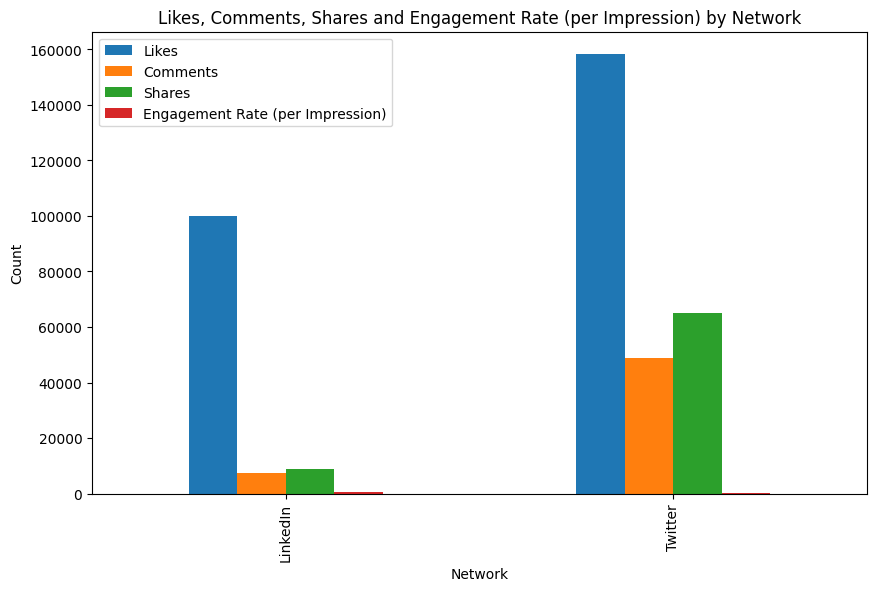

In [55]:
# Group by network and sum the likes, comments, and shares
grouped_data = network_imp.groupby('Network').agg({
    'Likes': 'sum',
    'Comments': 'sum',
    'Shares': 'sum',
    'Engagement Rate (per Impression)': 'sum'
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', x='Network', y=['Likes', 'Comments', 'Shares','Engagement Rate (per Impression)'], ax=ax)
plt.title('Likes, Comments, Shares and Engagement Rate (per Impression) by Network')
plt.xlabel('Network')
plt.ylabel('Count')
plt.legend(["Likes", "Comments", "Shares",'Engagement Rate (per Impression)'])
plt.show()

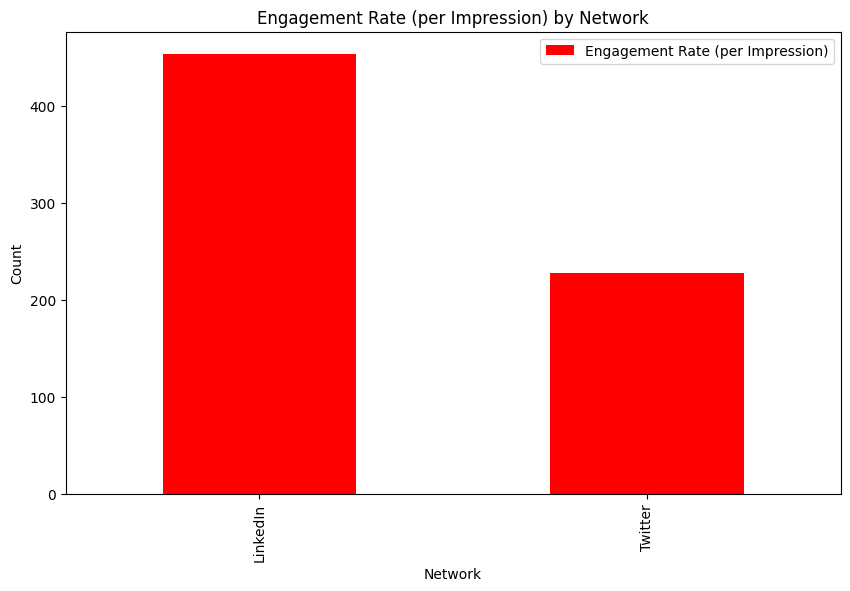

In [56]:
# Engament rae of twitter vs Linkedin
# Group by network and sum the likes, comments, and shares
grouped_data = network_imp.groupby('Network').agg({
    'Engagement Rate (per Impression)': 'sum'
}).reset_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', x='Network', y=['Engagement Rate (per Impression)'], color='red', ax=ax)
plt.title('Engagement Rate (per Impression) by Network')
plt.xlabel('Network')
plt.ylabel('Count')
plt.legend(['Engagement Rate (per Impression)'])
plt.show()